In [425]:
!pip install pyforest
import pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [426]:
dataset=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

<IPython.core.display.Javascript object>

In [427]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [428]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [429]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [430]:
dataset.shape

(7043, 21)

In [431]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [432]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [433]:
dataset.drop(["customerID"],axis=1,inplace=True)

In [434]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [435]:
discrete=[feature for feature in dataset.columns if dataset.columns.dtype=="O"]

In [436]:
discrete

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [437]:
for i in discrete:
  print("Value counts of", i)
  valuecount=dataset[i].value_counts().sort_values(ascending=False)
  print(valuecount,"")

Value counts of gender
Male      3555
Female    3488
Name: gender, dtype: int64 
Value counts of SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
Value counts of Partner
No     3641
Yes    3402
Name: Partner, dtype: int64 
Value counts of Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64 
Value counts of tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 
Value counts of PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 
Value counts of MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 
Value counts of InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 
Value counts of OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: i

In [438]:
binary=['Partner','Dependents','PhoneService','MultipleLines','PaperlessBilling', 'OnlineSecurity','OnlineBackup','StreamingTV',
 'StreamingMovies','DeviceProtection','TechSupport','Churn']

In [439]:
for i in binary:
  dataset[i]=np.where(dataset[i].values=="Yes",1,0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [440]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [441]:
dataset.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1
7042,Male,0,0,0,66,1,0,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),105.65,6844.5,0


In [442]:
dataset["gender"].replace({'Female': 1,'Male': 0},inplace=True)

In [443]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [444]:
IS=pd.get_dummies(dataset["InternetService"],drop_first=True)

<IPython.core.display.Javascript object>

In [445]:
dataset.drop(["InternetService"],axis=1,inplace=True)

In [446]:
dataset=pd.concat([dataset,IS],axis=1)

<IPython.core.display.Javascript object>

In [447]:
dataset["Contract"].replace({"Month-to-month":0,"One year":1,"Two year":2},inplace=True)

In [448]:
dataset["PaymentMethod"]=dataset["PaymentMethod"].map({"Electronic check":1,"Mailed check":2,"Bank transfer (automatic)":3,"Credit card (automatic)":4})

In [449]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Fiber optic,No
0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0,0,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,1,0,2,56.95,1889.5,0,0,0
2,0,0,0,0,2,1,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1,0,0
3,0,0,0,0,45,0,0,1,0,1,1,0,0,1,0,3,42.30,1840.75,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,0,1,1,70.70,151.65,1,1,0


In [450]:
numeric=["tenure","MonthlyCharges","TotalCharges"]

In [451]:
dataset.dtypes
  

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
Fiber optic           uint8
No                    uint8
dtype: object

In [452]:
dataset["tenure"] = dataset["tenure"].astype(float)
dataset["MonthlyCharges"] = dataset["MonthlyCharges"].astype(float)


In [453]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"],errors='coerce')

<IPython.core.display.Javascript object>

In [454]:
dataset.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Fiber optic           uint8
No                    uint8
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

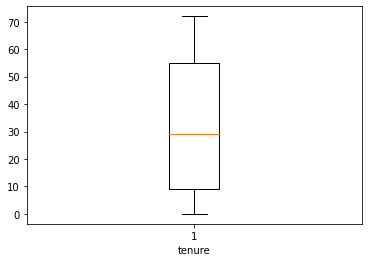

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

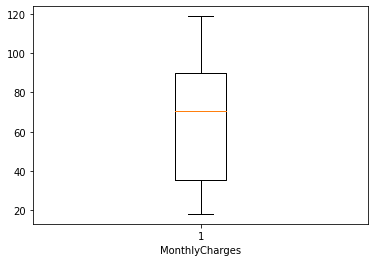

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

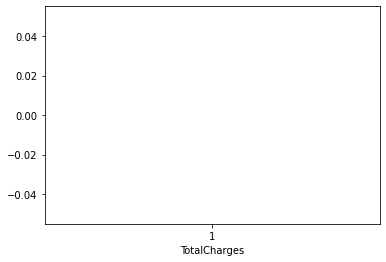

In [455]:
for i in numeric:
  plt.boxplot(dataset[i])
  plt.xlabel(i)
  plt.show()

In [456]:
x=dataset.drop("Churn",axis=1)

In [457]:
y=dataset["Churn"]

In [458]:
from sklearn.preprocessing import StandardScaler

In [459]:
ss=StandardScaler()

In [460]:
x=ss.fit_transform(x)

In [461]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=42)
x_train.shape

(1408, 20)

In [462]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6967
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7472
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7472
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7472
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7472
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7472
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7472
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7472
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7472
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7472
Epoch 11/100
44/44 [===================

In [463]:
model.evaluate(x_test, y_test)

177/177 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7315


[nan, 0.7314995527267456]

In [464]:
y_pred=model.predict(x_test)
y_pred[:5]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [466]:
yp = []
for element in y_pred:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)

In [467]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      4122
           1       0.00      0.00      0.00      1513

    accuracy                           0.73      5635
   macro avg       0.37      0.50      0.42      5635
weighted avg       0.54      0.73      0.62      5635



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
